In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [4]:
DATA_DIR = '/kaggle/input/image-colorization-dataset'
IMG_PATHS = glob(os.path.join(DATA_DIR, "**", "*.jpg"), recursive=True)

print("Total images:", len(IMG_PATHS))

Total images: 11478


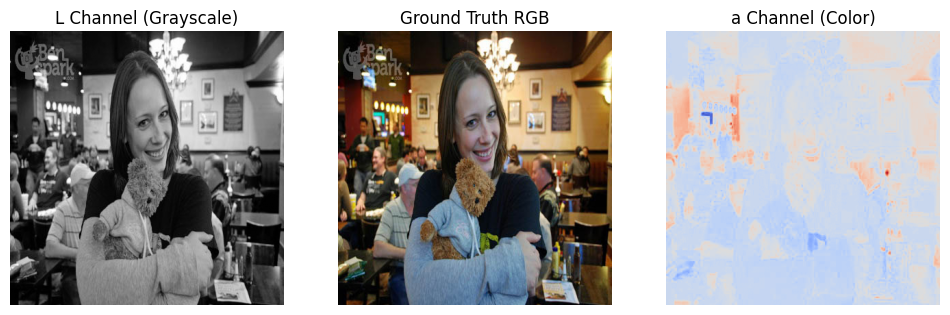

In [5]:
def show_colorization_pair(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    L, a, b = cv2.split(lab)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(L, cmap='gray')
    ax[0].set_title("L Channel (Grayscale)")
    ax[0].axis("off")

    ax[1].imshow(img)
    ax[1].set_title("Ground Truth RGB")
    ax[1].axis("off")

    ab = np.stack([a, b], axis=-1)
    ax[2].imshow(ab[...,0], cmap="coolwarm")
    ax[2].set_title("a Channel (Color)")
    ax[2].axis("off")

    plt.show()

show_colorization_pair(IMG_PATHS[0])

100%|██████████| 500/500 [00:05<00:00, 93.51it/s] 


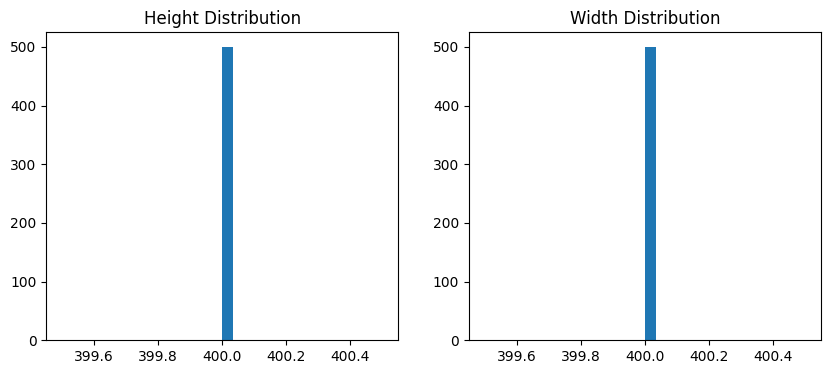

In [6]:
heights, widths = [], []

for path in tqdm(IMG_PATHS[:500]):  
    img = cv2.imread(path)
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(heights, bins=30)
plt.title("Height Distribution")

plt.subplot(1,2,2)
plt.hist(widths, bins=30)
plt.title("Width Distribution")
plt.show()

100%|██████████| 300/300 [00:01<00:00, 222.94it/s]


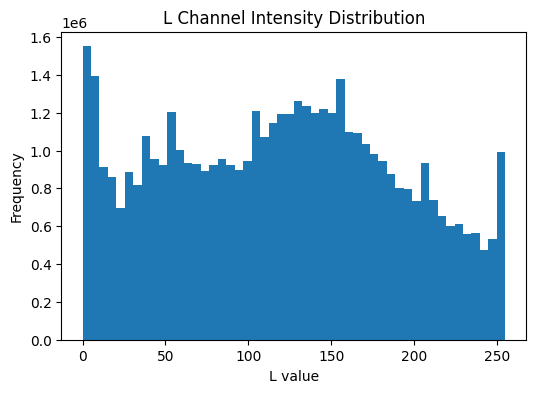

In [7]:
L_values = []

for path in tqdm(IMG_PATHS[:300]):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    L = lab[:,:,0]
    L_values.append(L.flatten())

L_values = np.concatenate(L_values)

plt.figure(figsize=(6,4))
plt.hist(L_values, bins=50)
plt.title("L Channel Intensity Distribution")
plt.xlabel("L value")
plt.ylabel("Frequency")
plt.show()

100%|██████████| 300/300 [00:01<00:00, 222.64it/s]


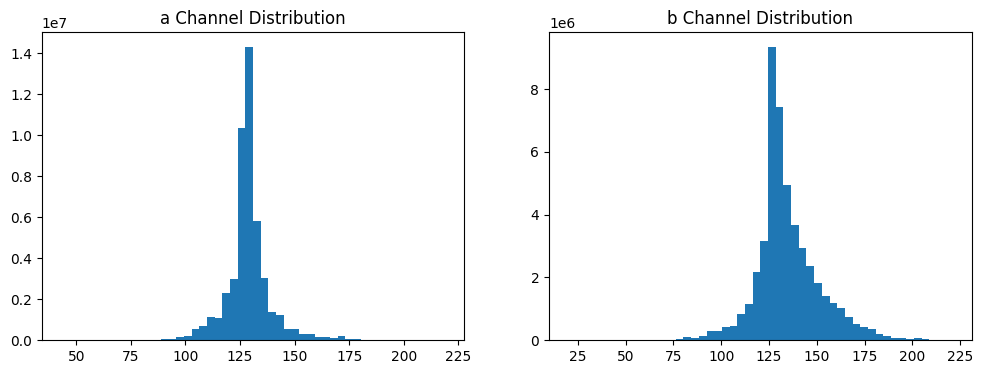

In [8]:
a_vals, b_vals = [], []

for path in tqdm(IMG_PATHS[:300]):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_vals.append(lab[:,:,1].flatten())
    b_vals.append(lab[:,:,2].flatten())

a_vals = np.concatenate(a_vals)
b_vals = np.concatenate(b_vals)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(a_vals, bins=50)
plt.title("a Channel Distribution")

plt.subplot(1,2,2)
plt.hist(b_vals, bins=50)
plt.title("b Channel Distribution")

plt.show()

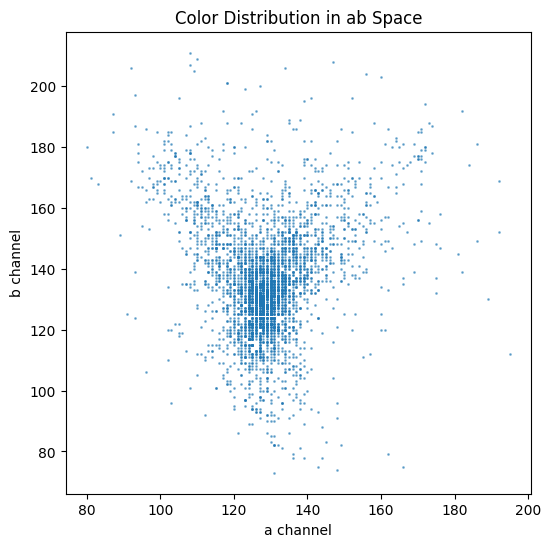

In [9]:
idx = np.random.choice(len(a_vals), size=5000, replace=False)

plt.figure(figsize=(6,6))
plt.scatter(a_vals[idx], b_vals[idx], s=1, alpha=0.5)
plt.xlabel("a channel")
plt.ylabel("b channel")
plt.title("Color Distribution in ab Space")
plt.show()

In [12]:
train_color = glob(
    "/kaggle/input/image-colorization-dataset/data/train_color/**/*.[jp][pn]g",
    recursive=True
)

train_black = glob(
    "/kaggle/input/image-colorization-dataset/data/train_black/**/*.[jp][pn]g",
    recursive=True
)

test_color = glob(
    "/kaggle/input/image-colorization-dataset/data/test_color/**/*.[jp][pn]g",
    recursive=True
)

test_black = glob(
    "/kaggle/input/image-colorization-dataset/data/test_black/**/*.[jp][pn]g",
    recursive=True
)

print("Train color:", len(train_color))
print("Train black:", len(train_black))
print("Test color:", len(test_color))
print("Test black:", len(test_black))

Train color: 5000
Train black: 5000
Test color: 739
Test black: 739


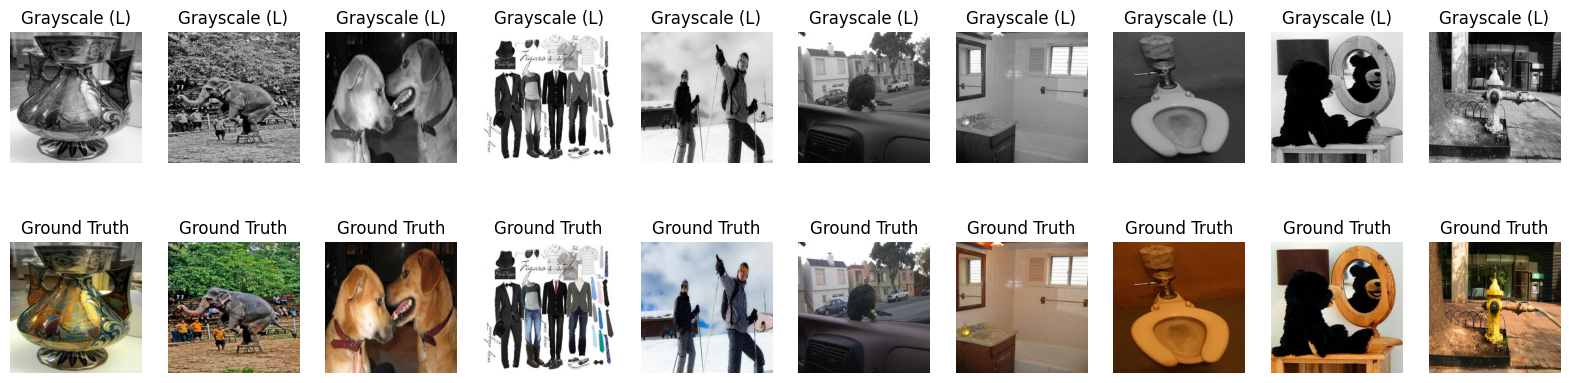

In [30]:
def plot_some_imgs(folder_path, n=3):
    img_paths = glob(os.path.join(folder_path, "*.jpg")) + \
                glob(os.path.join(folder_path, "*.png"))

    img_paths = img_paths[:n]

    plt.figure(figsize=(20, 10))

    for i, path in enumerate(img_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        L, a, b = cv2.split(lab)

        plt.subplot(2, n, i+1)
        plt.imshow(L, cmap="gray")
        plt.title("Grayscale (L)")
        plt.axis("off")

        plt.subplot(3, n, i+1+n)
        plt.imshow(img)
        plt.title("Ground Truth")
        plt.axis("off")

    plt.show()

plot_some_imgs("/kaggle/input/image-colorization-dataset/data/train_color", n=10)